In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:

df = pd.read_csv('links.csv')

df1 = pd.read_csv('movies.csv')

df2 = pd.read_csv('ratings.csv')

df3 = pd.read_csv('tags.csv')


In [17]:
df1.shape


(9742, 3)

In [18]:
df2.shape

(100836, 4)

In [19]:
    
unique_user_ids = df2['userId'].nunique()

print(f'Number of unique userId values: {unique_user_ids}')


Number of unique userId values: 610


In [20]:
rating_counts = df2['movieId'].value_counts()

# Find the movieId with the maximum number of ratings
most_rated_movie_id = rating_counts.idxmax()
most_rated_movie_count = rating_counts.max()

# Find the title of the most rated movie
most_rated_movie_title = df1[df1['movieId'] == most_rated_movie_id]['title'].values[0]

print(f'The movie with the maximum number of user ratings is: "{most_rated_movie_title}" with {most_rated_movie_count} ratings.')

The movie with the maximum number of user ratings is: "Forrest Gump (1994)" with 329 ratings.


In [21]:

matrix_movie_id = df1[df1['title'] == "Matrix, The (1999)"]['movieId'].values[0]

matrix_tags = df3[df3['movieId'] == matrix_movie_id]

print("Tags for 'Matrix, The (1999)':")
print(matrix_tags[['tag']])


Tags for 'Matrix, The (1999)':
                     tag
815         martial arts
816               sci-fi
1646  alternate universe
2794          philosophy
2795    post apocalyptic


In [22]:

terminator_movie_id = df1[df1['title'] == "Terminator 2: Judgment Day (1991)"]['movieId'].values[0]

# Select ratings for this movieId
terminator_ratings = df2[df2['movieId'] == terminator_movie_id]

# Calculate the average rating
average_rating = terminator_ratings['rating'].mean()

print(f'The average user rating for "Terminator 2: Judgment Day (1991)" is {average_rating:.2f}.')

The average user rating for "Terminator 2: Judgment Day (1991)" is 3.97.


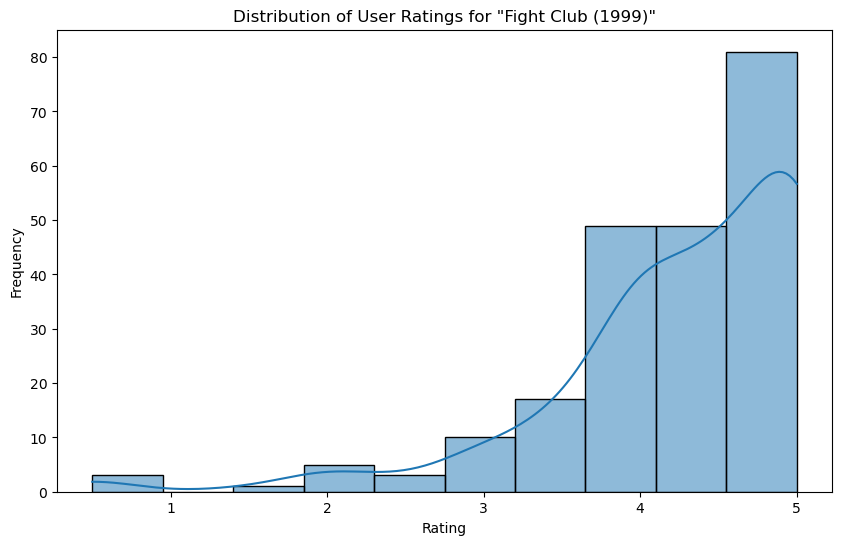

In [23]:
# Find the movieId for "Fight Club (1999)"
fight_club_movie_id = df1[df1['title'] == "Fight Club (1999)"]['movieId'].values[0]

# Select ratings for this movieId
fight_club_ratings = df2[df2['movieId'] == fight_club_movie_id]

# Plot the distribution of user ratings
plt.figure(figsize=(10, 6))
sns.histplot(fight_club_ratings['rating'], bins=10, kde=True)
plt.title('Distribution of User Ratings for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [25]:

average_ratings = df2.groupby('movieId')['rating'].mean().reset_index()


average_ratings = average_ratings.merge(df1, on='movieId')

most_popular_movie = average_ratings.loc[average_ratings['rating'].idxmax()]

print(f'The most popular movie based on average user ratings is "{most_popular_movie["title"]}" with an average rating of {most_popular_movie["rating"]:.2f}.')


The most popular movie based on average user ratings is "Lamerica (1994)" with an average rating of 5.00.


In [26]:

rating_counts = df2.groupby('movieId').size().reset_index(name='rating_count')

rating_counts = rating_counts.merge(df1, on='movieId')

top_5_movies = rating_counts.nlargest(5, 'rating_count')

print("Top 5 most popular movies based on the number of user ratings:")
print(top_5_movies[['title', 'rating_count']])

Top 5 most popular movies based on the number of user ratings:
                                 title  rating_count
314                Forrest Gump (1994)           329
277   Shawshank Redemption, The (1994)           317
257                Pulp Fiction (1994)           307
510   Silence of the Lambs, The (1991)           279
1938                Matrix, The (1999)           278


In [27]:

df_merged = pd.merge(df1, df2, on='movieId')

df_sci_fi = df_merged[df_merged['genres'].str.contains('Sci-Fi')]

rating_counts = df_sci_fi.groupby('movieId').size().reset_index(name='rating_count')

rating_counts = pd.merge(rating_counts, df1[['movieId', 'title']], on='movieId')

third_most_popular_sci_fi = rating_counts.sort_values(by='rating_count', ascending=False).iloc[2]

third_most_popular_sci_fi_title = third_most_popular_sci_fi['title']
third_most_popular_sci_fi_title


'Jurassic Park (1993)'